In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#altri import futuri

In [85]:
data = pd.read_csv("dataset/secondary_data.csv", sep=";")
print("Dimension:", data.shape)
data.head()

Dimension: (61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Siamo interessati a classificare i funghi come velenosi o meno, per questo motivo identifichiamo le due classi di interesse a partire dalla colonna "class" del dataset.

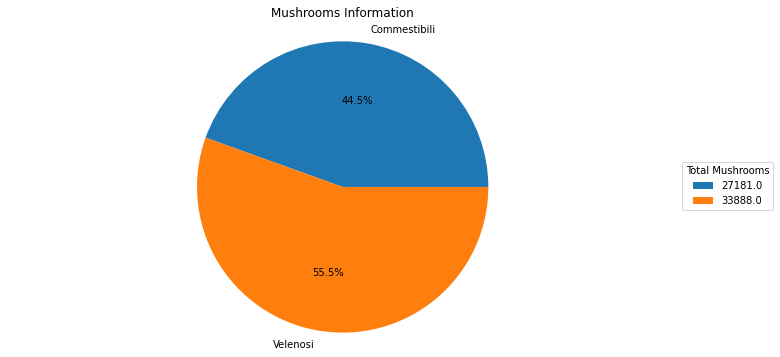

In [78]:
classes = [{"Commestibili": (data["class"] == "e").sum(), "Velenosi": (data["class"] == "p").sum()}]
total  = pd.DataFrame(classes)
total_e = float(total["Commestibili"])
total_p = float(total["Velenosi"])
mushrooms = [total_e, total_p]
mushrooms_labels = 'Commestibili','Velenosi'
fig, ax = plt.subplots(figsize = (12,6))
plt.pie(mushrooms,labels=mushrooms_labels,autopct='%1.1f%%')
plt.title('Mushrooms Information')
plt.axis('equal')
plt.legend(mushrooms,title="Total Mushrooms",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
fig.set_facecolor('white')
plt.show()

Conversione delle features categoriche in nominali, è necessario prima modificare il tipo di dato delle colonne 'object' in 'category' così da procedere con l'effettiva trasformazione dei valori categorici.
Si salva inoltre il dizionario che mantiene il mapping dei diversi valori categorici in numerici in caso di uso futuro.

In [86]:
mapping = []
encoder = LabelEncoder()

data = data.astype({"class": 'category', "cap-shape": 'category', "cap-surface": 'category', "cap-color": 'category', "does-bruise-or-bleed": 'category', 
"gill-attachment": 'category', "gill-spacing": 'category', "gill-color": 'category', "stem-root": 'category', "stem-surface": 'category', "stem-color": 'category', 
"veil-type": 'category', "veil-color": 'category', "has-ring": 'category', "ring-type": 'category', "spore-print-color": 'category', "habitat": 'category', 
"season": 'category'}, errors = 'raise')

data.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [87]:
for i in range(len(data.columns)):
    if (data[data.columns[i]].dtype == "category"):
        data[data.columns[i]] = encoder.fit_transform(data[data.columns[i]])
        mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
        mapping.append(mapping_dict)
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'o', 4: 'p', 5: 's', 6: 'x'},
 {0: 'd',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'i',
  5: 'k',
  6: 'l',
  7: 's',
  8: 't',
  9: 'w',
  10: 'y',
  11: nan},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'k',
  4: 'l',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'd', 2: 'e', 3: 'f', 4: 'p', 5: 's', 6: 'x', 7: nan},
 {0: 'c', 1: 'd', 2: 'f', 3: nan},
 {0: 'b',
  1: 'e',
  2: 'f',
  3: 'g',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'r', 4: 's', 5: nan},
 {0: 'f', 1: 'g', 2: 'h', 3: 'i', 4: 'k', 5: 's', 6: 't', 7: 'y', 8: nan},
 {0: 'b',
  1: 'e',
  2: 'f',
  3: 'g',
  4: 'k',
  5: 'l',
  6: 'n',
  7: 'o',
  8: 'p',
  9: 'r',
  10: 'u',
  11: 'w',
  12: 'y'},
 {0: 'u', 1: nan},
 {0: 'e', 1: 'k', 2: 'n', 3: 'u', 4: 'w', 5: 'y', 6: nan},
 {0: 'f', 1: 't'},
 {0: 'e', 1: 'f', 2: 'g', 3: 'l', 4: 'm', 5: 'p', 6: 'r', 7: 'z', 8: nan},


In [88]:
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,...,4,7,11,0,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,...,4,7,11,0,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,...,4,7,11,0,4,1,2,7,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,...,4,7,11,0,4,1,5,7,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,...,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,5,7,11,0,3,2,2,3.93,...,5,8,12,1,6,0,1,7,0,0
61065,1,1.27,2,7,11,0,3,2,2,3.18,...,5,8,12,1,6,0,1,7,0,0
61066,1,1.27,5,7,11,0,3,2,2,3.86,...,5,8,12,1,6,0,1,7,0,2
61067,1,1.24,2,7,11,0,3,2,2,3.56,...,5,8,12,1,6,0,1,7,0,2
